## Drug Abuse in the United States

Alexander MacLeod, June 7th, 2018

# Background
The topic for my project is drug abuse of specific substances like marijuana, heroin, and cocaine in America.

I aim to find if states with high use of one drug also report high use of other substances which could potentially show a correlation between the use of different substances.

To figure out if there is a correlation I will compare reported use of each substance by state in the country to see if there is a correlation between the use of one substance increasing or decreasing the use of another substance.

The dataset used is from a national survey that reports the amount of estimated users of marijuana, heroin, and cocaine in each state. The national survey report broke down the estimated users into several different categories that had age ranges from 12-17, 18-25, and 26+ as well as categories for 12+ and 18+, giving a wide variety of options to use to calculate data.

# Data
I am interested in comparing the relationship between variables to see if there are correlations between the use of one drug and increased/decreased use of others within a state, region, or age demographic.


In [48]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as pit
import statsmodels.formula.api as smf
%matplotlib inline

#Different data frames
df = pd.read_csv("new_survey_drug_use.csv")
df2 = df.iloc[6:]
df3 = df.iloc[1:5]
#print(df.loc[:, "Mar_12_17": "Mari_26up"])
#marmean = np.mean(df[:, "Mar_12_17": "Mari_26up"])

#Marijuana Statistics
mar = df.iloc[6:, 1: 4]
mar_max_value = np.max(mar)
mar_min_value = np.min(mar)    
mar_min_state1 = mar.index[mar["Mari_12_17"] == np.min(mar["Mari_12_17"])]
mar_min_state2 = mar.index[mar["Mari_18_25"] == np.min(mar["Mari_18_25"])]
mar_min_state3 = mar.index[mar["Mari_26up"] == np.min(mar["Mari_26up"])]
mar_statemin1 = df.loc[mar_min_state1,"State"]
mar_statemin2 = df.loc[mar_min_state2, "State"]
mar_statemin3 = df.loc[mar_min_state3, "State"]
mar_max_state1 = mar.index[mar["Mari_12_17"] == np.max(mar["Mari_12_17"])]
mar_max_state2 = mar.index[mar["Mari_18_25"] == np.max(mar["Mari_18_25"])]
mar_max_state3 = mar.index[mar["Mari_26up"] == np.max(mar["Mari_26up"])]
mar_statemax1 = df.loc[mar_max_state1, "State"]
mar_statemax2 = df.loc[mar_max_state2, "State"]
mar_statemax3 = df.loc[mar_max_state3, "State"]
print("Estimated Marijuana Use Statistics")
print("All data is in thousands and by state")
print("Observations:", len(mar), "\n")
print("Mean amount of users by age:", "\n", mar.mean(),"\n")
print("Standard Deviation:", "\n", mar.std(),"\n")
print("The Highest Amount of Users per Age Group:", "\n",mar_max_value, "\n")
print("State with Highest Amount of Users for Ages 12-17", mar_statemax1)
print("State with Highest Amount of Users for Ages 18-25:", mar_statemax2)
print("State with Highest Amount of Users for Ages 26+:", mar_statemax3, "\n")
print("The Lowest Amount of Use per Age Group:", "\n",mar_min_value)
print("State with Lowest Amount of Users for Ages 12-17:", mar_statemin1)
print("State with Lowest Amount of Users for Ages 18-25:", mar_statemin2)
print("State with Lowest Amount of Users for Ages 26+:", mar_statemin3)

Estimated Marijuana Use Statistics
All data is in thousands and by state
Observations: 50 

Mean amount of users by age: 
 Mari_12_17     63.28
Mari_18_25    221.24
Mari_26up     419.42
dtype: float64 

Standard Deviation: 
 Mari_12_17     75.327866
Mari_18_25    255.811678
Mari_26up     507.809666
dtype: float64 

The Highest Amount of Users per Age Group: 
 Mari_12_17     431
Mari_18_25    1459
Mari_26up     3046
dtype: int64 

State with Highest Amount of Users for Ages 12-17 9    California
Name: State, dtype: object
State with Highest Amount of Users for Ages 18-25: 9    California
Name: State, dtype: object
State with Highest Amount of Users for Ages 26+: 9    California
Name: State, dtype: object 

The Lowest Amount of Use per Age Group: 
 Mari_12_17     5
Mari_18_25    17
Mari_26up     27
dtype: int64
State with Lowest Amount of Users for Ages 12-17: 13    District of Columbia
Name: State, dtype: object
State with Lowest Amount of Users for Ages 18-25: 55    Wyoming
Name: State

In [49]:
#Cocaine Statistics
coca = df.iloc[6:, 6: 9]
coca_max_value = np.max(coca)
coca_min_value = np.min(coca)    
coca_min_state1 = coca.index[coca["Coca_12_17"] == np.min(coca["Coca_12_17"])]
coca_min_state2 = mar.index[coca["Coca_18_25"] == np.min(coca["Coca_18_25"])]
coca_min_state3 = mar.index[coca["Coca_26up"] == np.min(coca["Coca_26up"])]
coca_statemin1 = df.loc[coca_min_state1,"State"]
coca_statemin2 = df.loc[coca_min_state2, "State"]
coca_statemin3 = df.loc[coca_min_state3, "State"]
coca_max_state1 = coca.index[coca["Coca_12_17"] == np.max(coca["Coca_12_17"])]
coca_max_state2 = coca.index[coca["Coca_18_25"] == np.max(coca["Coca_18_25"])]
coca_max_state3 = coca.index[coca["Coca_26up"] == np.max(coca["Coca_26up"])]
coca_statemax1 = df.loc[coca_max_state1, "State"]
coca_statemax2 = df.loc[coca_max_state2, "State"]
coca_statemax3 = df.loc[coca_max_state3, "State"]
print("Estimated Cocaine Use Statistics")
print("All data is in thousands and by state")
print("Observations:", len(coca), "\n")
print("Mean Amount of Users by Age:", "\n", coca.mean(), "\n")
print("Standard Deviation:", "\n", coca.std(),"\n")
print("The Highest Amount of Use per Age Group:", "\n",coca_max_value)
print("State with Highest Amount of Users for Ages 12-17", coca_statemax1)
print("State with Highest Amount of Users for Ages 18-25:", coca_statemax2)
print("State with Highest Amount of Users for Ages 26+:", coca_statemax3,"\n")
print("The Lowest Amount of Use per Age Group:", "\n",coca_min_value)
print("States with Lowest Amount of Users for Ages 12-17:", "\n", coca_statemin1)
print("State with Lowest Amount of Users for Ages 18-25:", coca_statemin2)
print("State with Lowest Amount of Users for Ages 26+:", coca_statemin3)

Estimated Cocaine Use Statistics
All data is in thousands and by state
Observations: 50 

Mean Amount of Users by Age: 
 Coca_12_17     3.12
Coca_18_25    34.36
Coca_26up     55.20
dtype: float64 

Standard Deviation: 
 Coca_12_17     4.714892
Coca_18_25    45.127375
Coca_26up     73.309242
dtype: float64 

The Highest Amount of Use per Age Group: 
 Coca_12_17     29
Coca_18_25    263
Coca_26up     407
dtype: int64
State with Highest Amount of Users for Ages 12-17 9    California
Name: State, dtype: object
State with Highest Amount of Users for Ages 18-25: 9    California
Name: State, dtype: object
State with Highest Amount of Users for Ages 26+: 9    California
Name: State, dtype: object 

The Lowest Amount of Use per Age Group: 
 Coca_12_17    0
Coca_18_25    2
Coca_26up     3
dtype: int64
States with Lowest Amount of Users for Ages 12-17: 
 6                   Alaska
12                Delaware
13    District of Columbia
31                 Montana
39            North Dakota
46       

In [50]:
#Heroin Statistics
hero = df.iloc[6:, 11: 14]
hero_max_value = np.max(hero)
hero_min_value = np.min(hero)    
hero_min_state1 = hero.index[hero["Hero_12_17"] == np.min(hero["Hero_12_17"])]
hero_min_state2 = mar.index[hero["Hero_18_25"] == np.min(hero["Hero_18_25"])]
hero_min_state3 = mar.index[hero["Hero_26up"] == np.min(hero["Hero_26up"])]
hero_statemin1 = df.loc[hero_min_state1,"State"]
hero_statemin2 = df.loc[hero_min_state2, "State"]
hero_statemin3 = df.loc[hero_min_state3, "State"]
hero_max_state1 = hero.index[hero["Hero_12_17"] == np.max(hero["Hero_12_17"])]
hero_max_state2 = hero.index[hero["Hero_18_25"] == np.max(hero["Hero_18_25"])]
hero_max_state3 = hero.index[hero["Hero_26up"] == np.max(hero["Hero_26up"])]
hero_statemax1 = df.loc[hero_max_state1, "State"]
hero_statemax2 = df.loc[hero_max_state2, "State"]
hero_statemax3 = df.loc[hero_max_state3, "State"]
print("Estimated Heroin Use Statistics")
print("All data is in thousands and by state")
print("Observations:", len(hero),"\n")
print("Mean Amount of Users by Age:", "\n", hero.mean(),"\n")
print("Standard Deviation:", "\n", hero.std(),"\n")
print("The Highest Amount of Users per Age Group:", "\n",hero_max_value)
print("State with Highest Amount of Users for Ages 12-17", hero_statemax1)
print("State with Highest Amount of Users for Ages 18-25:", hero_statemax2)
print("State with Highest Amount of Users for Ages 26+:", hero_statemax3,"\n")
print("The Lowest Amount of Use per Age Group:", "\n",hero_min_value)
print("States with Lowest Use for Ages 12-17:", "\n", hero_statemin1)
print("State with Lowest Use for Ages 18-25:", hero_statemin2)
print("State with Lowest Use for Ages 26+:", hero_statemin3)

Estimated Heroin Use Statistics
All data is in thousands and by state
Observations: 50 

Mean Amount of Users by Age: 
 Hero_12_17     0.40
Hero_18_25     4.80
Hero_26up     11.92
dtype: float64 

Standard Deviation: 
 Hero_12_17     0.638877
Hero_18_25     4.936329
Hero_26up     13.565924
dtype: float64 

The Highest Amount of Users per Age Group: 
 Hero_12_17     3
Hero_18_25    24
Hero_26up     68
dtype: int64
State with Highest Amount of Users for Ages 12-17 9    California
Name: State, dtype: object
State with Highest Amount of Users for Ages 18-25: 9    California
Name: State, dtype: object
State with Highest Amount of Users for Ages 26+: 37    New York
Name: State, dtype: object 

The Lowest Amount of Use per Age Group: 
 Hero_12_17    0
Hero_18_25    0
Hero_26up     1
dtype: int64
States with Lowest Use for Ages 12-17: 
 6                   Alaska
8                 Arkansas
11             Connecticut
12                Delaware
13    District of Columbia
15                 Georg

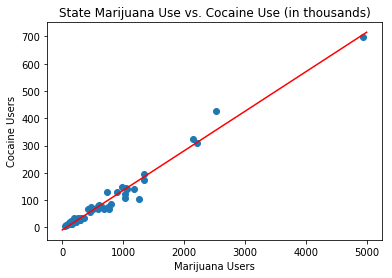

In [60]:
#Scatterplot comparing marijuana and cocaine use
all_scat1 = pit.figure()
pit.scatter(df2["Mari_12up"], df2["Coca_12up"])
pit.title("State Marijuana Use vs. Cocaine Use (in thousands)")
pit.xlabel("Marijuana Users")
pit.ylabel("Cocaine Users")

x = np.linspace(0,5000, 100)
y = -9.278 + 0.1449*x
pit.plot(x,y, color="r")
pit.show()

In [52]:
#Model for graph
mdl_info = df2[["Mari_12up", "Coca_12up"]]
#mdl_info.head()
model = smf.ols(formula = "Coca_12up ~ Mari_12up", data=mdl_info)
est = model.fit()
est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              Coca_12up   R-squared:                       0.976
Model:                            OLS   Adj. R-squared:                  0.975
Method:                 Least Squares   F-statistic:                     1930.
Date:                Thu, 07 Jun 2018   Prob (F-statistic):           2.03e-40
Time:                        10:40:43   Log-Likelihood:                -217.92
No. Observations:                  50   AIC:                             439.8
Df Residuals:                      48   BIC:                             443.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -9.2378      3.583     -2.578      0.013     -16.442      -2.033
Mari_12up      0.1449      0.003     43.927      0.000       0.138       0.152
==============================================================================
Omnibus:                       14.178   Durbin-Watson:                   1.703
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               55.783
Skew:                          -0.236   Prob(JB):                     7.71e-13
Kurtosis:                       8.153   Cond. No.                     1.43e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.43e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

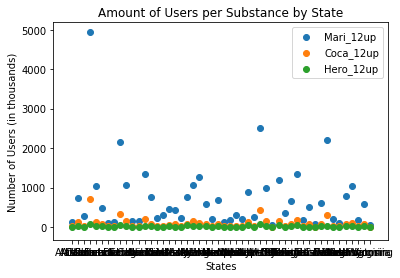

In [59]:
#Additional Graph for interpretation
all_scat2 = pit.figure()
pit.scatter(df2["State"], df2["Mari_12up"])
pit.scatter(df2["State"], df2["Coca_12up"])
pit.scatter(df2["State"], df2["Hero_12up"])
pit.title("Amount of Users per Substance by State")
pit.xlabel("States")
pit.ylabel("Number of Users (in thousands)")
pit.legend()
pit.show()

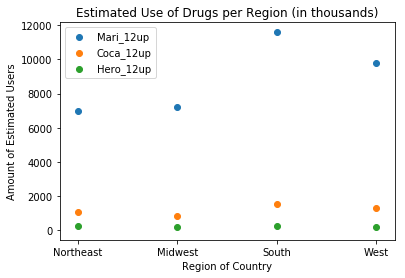

In [53]:
#Scatterplot comparing drug use by region
all_scat3 = pit.figure()
pit.scatter(df3["State"], df3["Mari_12up"])
pit.scatter(df3["State"], df3["Coca_12up"])
pit.scatter(df3["State"], df3["Hero_12up"])
pit.title("Estimated Use of Drugs per Region (in thousands)")
pit.xlabel("Region of Country")
pit.ylabel("Amount of Estimated Users")
pit.legend()
pit.show()

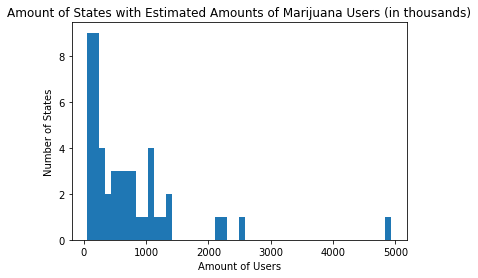

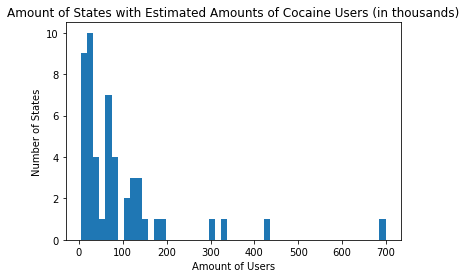

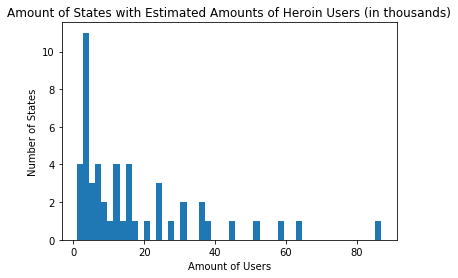

In [54]:
#Histogram data for all three substances
all_hist = pit.figure()
pit.hist(df2["Mari_12up"], bins=50)
pit.title("Amount of States with Estimated Amounts of Marijuana Users (in thousands)")
pit.xlabel("Amount of Users")
pit.ylabel("Number of States")
pit.show()
pit.hist(df2["Coca_12up"], bins=50)
pit.title("Amount of States with Estimated Amounts of Cocaine Users (in thousands)")
pit.xlabel("Amount of Users")
pit.ylabel("Number of States")
pit.show()
pit.hist(df2["Hero_12up"], bins=50)
pit.title("Amount of States with Estimated Amounts of Heroin Users (in thousands)")
pit.xlabel("Amount of Users")
pit.ylabel("Number of States")
pit.show()

# Analysis
The hypothesis being tested is to see if there is a difference in use between marijuana and cocaine in each state.

The null hypothesis would be that there is no difference in the amount of users of marijuana and cocaine in each state. The alternative hypothesis would be that there is a difference in the amount of users of marijuana and cocaine per state.

From the hypothesis testing a Z value of 5.23 was obtained, which is greated than the critical value of 1.96 meaning that the null hypothesis can be rejected with 95% confidence.

The relationship being tested with linear regression is the correlation between increased use of marijuana leading to increased use of cocaine in states.

The scatterplot created above does represent a linear relationship between the use of marijuana and the use of cocaine. Interpreting the intercept and slope can help to better understand the linear relationship modeled in the scatterplot. There is a negative intercept which stems from a lot of points being clustered around the origin. The slope produced represents the positive relationship between the amount of marijuana users and cocaine users. The slope was found to be 0.1449, which means that for every 1,000 marijuana users (without scale) there is estimated to be an additional 145 cocaine users. Adding the scale this means that for every 1,000,000 additional marijuana users there is estimated to be an additional 145,000 cocaine users.

In [55]:
#Hypothesis Testing
df4 = df.iloc[6:, 4:5]
df5 = df.iloc[6:, 9:10]
mar_use = len(mar)
coc_use = len(coca)
mar_mean = 703.94
coc_mean = 92.78
mar_std = 814.03
coc_std = 143.01
print("Marijuana Use:")
print("Observations:", mar_use)
print("Mean:", mar_mean)
print("Standard Deviation:", mar_std)
print("Variance:", mar_std**2,"\n")
print("Cocaine Use:")
print("Observations:", coc_use)
print("Mean:", coc_mean)
print("Standard Deviation:", coc_std)
print("Variance:", coc_std**2, "\n")

obs_diff = (mar_mean - coc_mean)
exp_diff = 0
std_error = np.sqrt(((mar_std**2)/mar_use) + ((coc_std**2)/coc_use))

print("Sample Difference:", obs_diff)
print("Expected Population Difference:", exp_diff)
print("Standard Error:", std_error, "\n")

z = ((obs_diff - exp_diff) / std_error)
print("Z-Test Value:", z)

Marijuana Use:
Observations: 50
Mean: 703.94
Standard Deviation: 814.03
Variance: 662644.8409 

Cocaine Use:
Observations: 50
Mean: 92.78
Standard Deviation: 143.01
Variance: 20451.860099999998 

Sample Difference: 611.1600000000001
Expected Population Difference: 0
Standard Error: 116.88427618803138 

Z-Test Value: 5.228761471875215


# Conclusion
From researching this topic I've been able to learn that there's a positive correlation between the use of marijuana and the use of cocaine in states, which was a bit stronger than anticipated. I had also expected there to be a positive correlation between the use of cocaine and the use of heroin but there seemed to be no real correlation between the use of either marijuana or cocaine and the use of heroin.

The most interesting part of the project was figuring out the different codes to describe one drug from my data and then being able to reapply a similar code for the other drugs to get statistical information of all of them. The code needed varied from creating slices of my data frame to making the program figure out the state(s) with the lowest/highest amount of users for a substance and then telling me which state(s) they were.

The most challenging part of working with this dataset was figuring out which part of my data I wanted to use to analyze for the different sections. For some sections it was useful to analyze the different age ranges from 12-17, to 18-25 and then 26 and above. But for other sections looking at the 12 and above section was more useful and for one graph using the regional data was the most useful.